# <center> Contaminant Transport Example
Copyright (C) 2014-2019 The BET Development Team


This example takes uniformly distributed samples of parameters and
output data from a simple groundwater contaminant transport model,
and calculates solutions to the stochastic inverse problem.
The parameter domain is 5D, where the uncertain parameters are the x and y 
locations of the source, the horizontal dispersivity, the flow angle,
and the contaminant flux. There are 11 measured QoIs in the data space 
available. By changing the choice of QoIs that we use to solve the stochastic
inverse problem, we see the effect of geometric distinctness. 
Probabilities in the parameter space are 
calculated using the MC assumption.  1D and 2D marginals are calculated,
smoothed, and plotted. The samples are then ranked by probability density
and the volume of high-probability regions are calculated. Probabilistic predictions of other QoI are made.


In [1]:
import numpy as np
import bet.calculateP as calculateP
import bet.postProcess as postProcess
import bet.calculateP.simpleFunP as simpleFunP
import bet.calculateP.calculateP as calculateP
import bet.postProcess.plotP as plotP
import bet.postProcess.plotDomains as plotD
import bet.postProcess.postTools as postTools
import bet.sample as samp
from IPython.display import Image
import glob

In [2]:
# Labels and descriptions of the uncertain parameters
labels = ['Source $y$ coordinate [L]', 'Source $x$ coordinate [L]', 'Dispersivity x [L]', 'Flow Angle [degrees]', 'Contaminant flux [M/T]']

# Load data from files
# First obtain info on the parameter domain
parameter_domain = np.loadtxt("files/lam_domain.txt.gz") #parameter domain
parameter_dim = parameter_domain.shape[0]

# Create input sample set
input_samples = samp.sample_set(parameter_dim)
input_samples.set_domain(parameter_domain)
input_samples.set_values(np.loadtxt("files/samples.txt.gz"))
input_samples.estimate_volume_mc() # Use standard MC estimate of volumes

# Choose which QoI to use and create output sample set
QoI_indices_observe = np.array([0,1,2,3])
output_samples = samp.sample_set(QoI_indices_observe.size)
output_samples.set_values(np.loadtxt("files/data.txt.gz")[:,QoI_indices_observe])

In [3]:
# Create discretization object
my_discretization = samp.discretization(input_sample_set=input_samples,
                                        output_sample_set=output_samples)

# Load the reference parameter and QoI values
param_ref = np.loadtxt("files/lam_ref.txt.gz") #reference parameter set
Q_ref = np.loadtxt("files/Q_ref.txt.gz")[QoI_indices_observe] #reference QoI set

# Plot the data domain
plotD.scatter_rhoD(my_discretization, ref_sample=Q_ref, io_flag='output', showdim=2)

output_samples_x2x4_cs.png


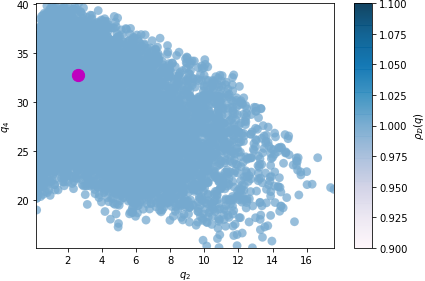

output_samples_x1x3_cs.png


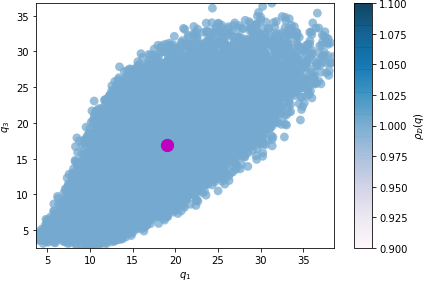

output_samples_x3x4_cs.png


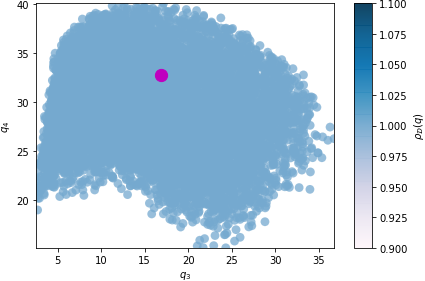

output_samples_x2x3_cs.png


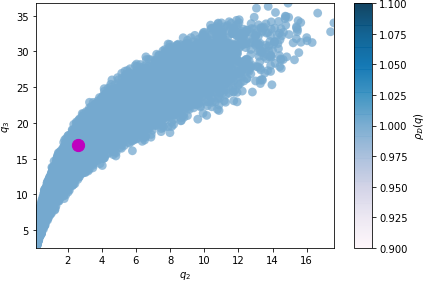

output_samples_x1x2_cs.png


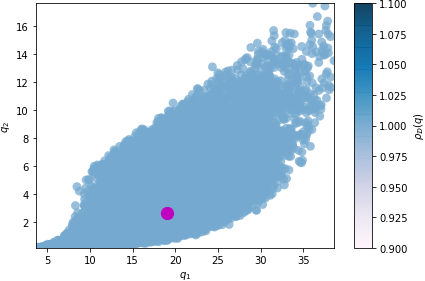

output_samples_x1x4_cs.png


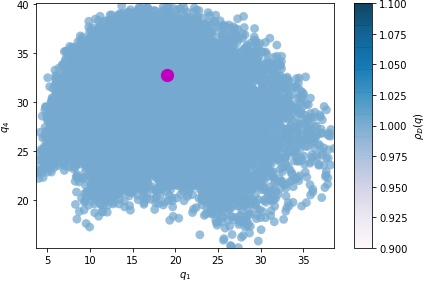

In [4]:
for f in glob.glob('output*.png'):
        print(f)
        display(Image(f))

In [5]:
# Whether or not to use deterministic description of simple function approximation of
# ouput probability
deterministic_discretize_D = True
if deterministic_discretize_D == True:
  simpleFunP.regular_partition_uniform_distribution_rectangle_scaled(data_set=my_discretization,
                                                                     Q_ref=Q_ref,
                                                                     rect_scale=0.25,
                                                                     cells_per_dimension = 1)
else:
  simpleFunP.uniform_partition_uniform_distribution_rectangle_scaled(data_set=my_discretization,
                                                                     Q_ref=Q_ref,
                                                                     rect_scale=0.25,
                                                                     M=50,
                                                                     num_d_emulate=1E5)
# calculate probablities making Monte Carlo assumption
calculateP.prob(my_discretization)

In [6]:
# calculate 2D marginal probabilities
(bins, marginals2D) = plotP.calculate_2D_marginal_probs(my_discretization.get_input_sample_set(), nbins = 10)

# smooth 2D marginal probabilites for plotting (optional)
marginals2D = plotP.smooth_marginals_2D(marginals2D, bins, sigma=1.0)

# plot 2D marginal probabilities
plotP.plot_2D_marginal_probs(marginals2D, bins, my_discretization, filename = "contaminant_map",
                             plot_surface=False,
                             lam_ref = param_ref,
                             lambda_label=labels,
                             interactive=False)

/home/mpilosov/anaconda3/lib/python3.6/site-packages/scipy/fftpack/basic.py:159: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


contaminant_map_2D_3_4.png


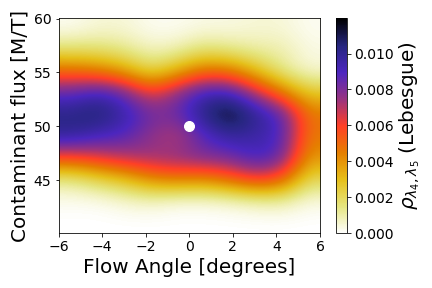

contaminant_map_2D_1_3.png


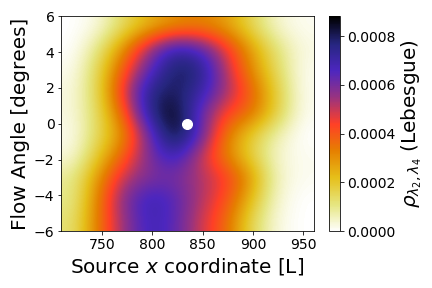

contaminant_map_2D_1_2.png


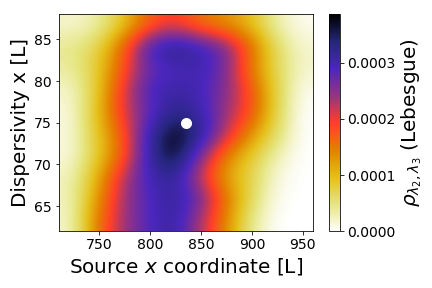

contaminant_map_2D_0_2.png


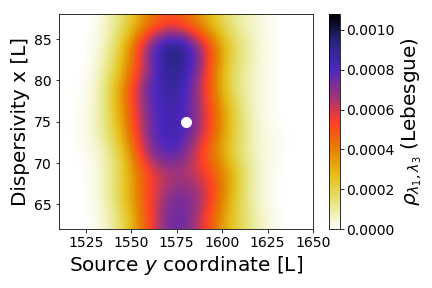

contaminant_map_2D_2_4.png


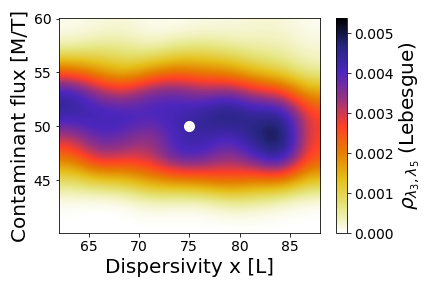

contaminant_map_2D_0_4.png


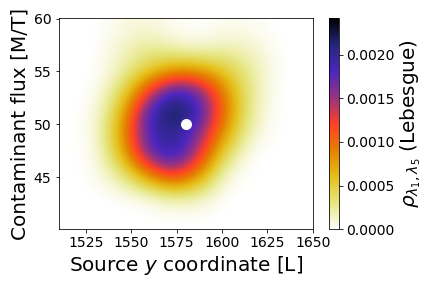

contaminant_map_2D_0_3.png


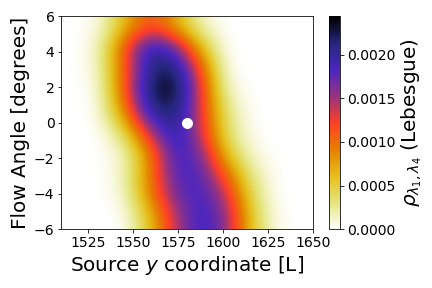

contaminant_map_2D_0_1.png


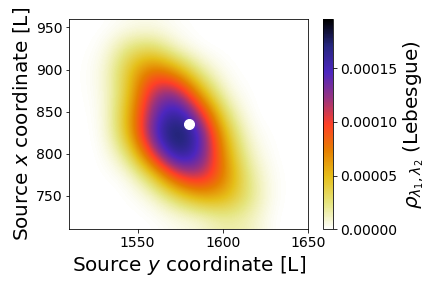

contaminant_map_2D_1_4.png


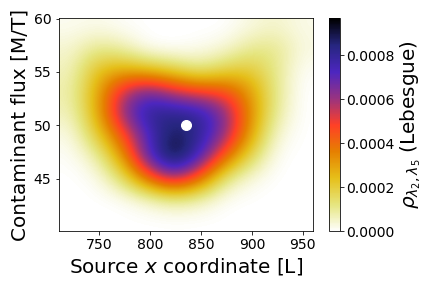

contaminant_map_2D_2_3.png


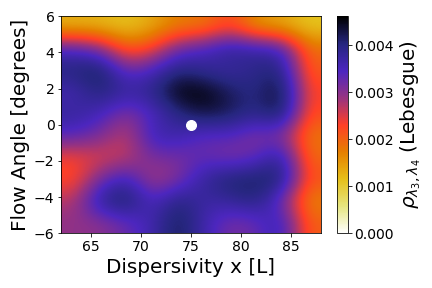

In [7]:
for f in glob.glob('contaminant_map_2D*.png'):
        print(f)
        display(Image(f))

In [8]:
# calculate 1d marginal probs
(bins, marginals1D) = plotP.calculate_1D_marginal_probs(my_discretization.get_input_sample_set(), nbins = 20)

# smooth 1d marginal probs (optional)
marginals1D = plotP.smooth_marginals_1D(marginals1D, bins, sigma=1.0)

# plot 1d marginal probs
plotP.plot_1D_marginal_probs(marginals1D, bins, my_discretization,
                             filename = "contaminant_map",
                             interactive=False,
                             lam_ref=param_ref,
                             lambda_label=labels)

<Figure size 432x288 with 0 Axes>

contaminant_map_1D_2.png


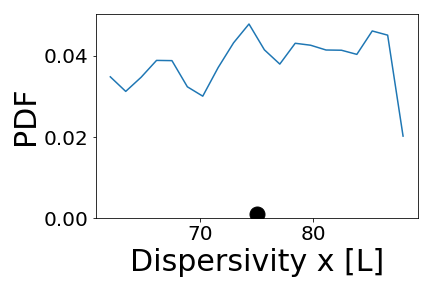

contaminant_map_1D_4.png


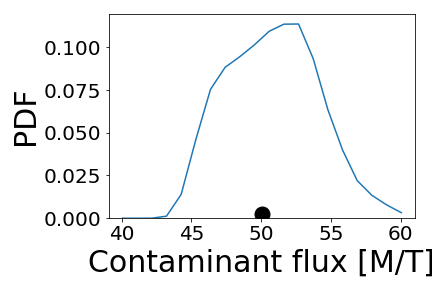

contaminant_map_1D_0.png


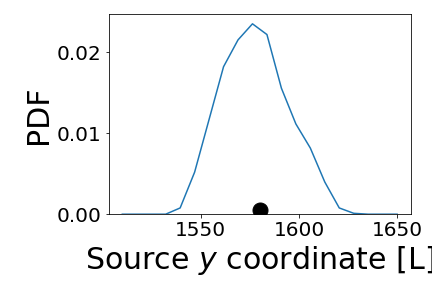

contaminant_map_1D_3.png


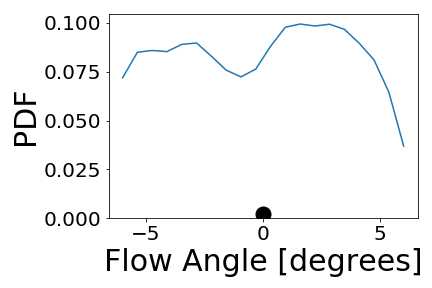

contaminant_map_1D_1.png


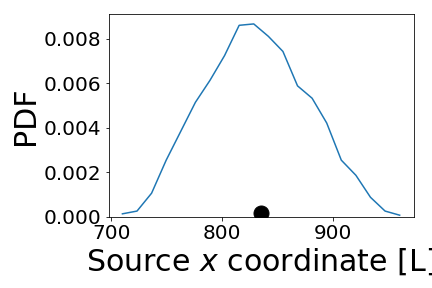

In [9]:
for f in glob.glob('contaminant_map_1D*.png'):
        print(f)
        display(Image(f))

In [10]:
percentile = 1.0
# Sort samples by highest probability density and sample highest percentile percent samples
(num_samples, my_discretization_highP, indices)= postTools.sample_highest_prob(
    percentile, my_discretization, sort=True)

# print the number of samples that make up the  highest percentile percent samples and
# ratio of the volume of the parameter domain they take up
print((num_samples, np.sum(my_discretization_highP._input_sample_set.get_volumes())))

# Choose unused QoI as prediction QoI and propagate measure onto predicted QoI data space
QoI_indices_predict = np.array([7])

(647, 0.06470000000000001)


In [11]:
output_samples_predict = samp.sample_set(QoI_indices_predict.size)
output_samples_predict.set_values(np.loadtxt("files/data.txt.gz")[:,QoI_indices_predict])
output_samples_predict.set_probabilities(input_samples.get_probabilities())

# Determine range of predictions and store as domain for plotting purposes
output_samples_predict.set_domain(output_samples_predict.get_bounding_box())

In [12]:
# Plot 1D pdf of predicted QoI
# calculate 1d marginal probs
(bins_pred, marginals1D_pred) = plotP.calculate_1D_marginal_probs(output_samples_predict,
                                                                  nbins = 20)

# plot 1d pdf 
plotP.plot_1D_marginal_probs(marginals1D_pred, bins_pred, output_samples_predict,
                             filename = "contaminant_prediction", interactive=False)

<Figure size 432x288 with 0 Axes>

contaminant_prediction_1D_0.png


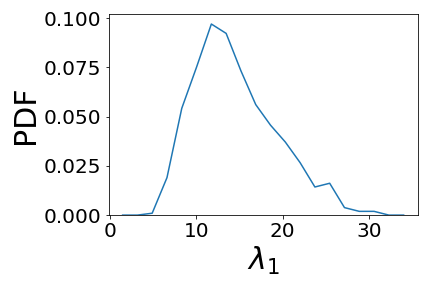

In [13]:
for f in glob.glob('contaminant_prediction*.png'):
        print(f)
        display(Image(f))

In [14]:
%store my_discretization
%store param_ref
%store Q_ref

Stored 'my_discretization' (discretization)
Stored 'param_ref' (ndarray)
Stored 'Q_ref' (ndarray)


# Remove all Files (optional)

In [15]:
!rm *.png